In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\ACER\Downloads\heart_attack_prediction_indonesia2.csv")
df

,age,gender,hypertension,diabetes,cholesterol_level,obesity,smoking_status,alcohol_consumption,physical_activity,stress_level,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,heart_attack
0,60,Male,0,1,211,0,Never,NaN,High,Moderate,113,62,173,48,121,101,0,0
1,53,Female,0,0,208,0,Past,NaN,Moderate,High,132,76,70,58,83,138,1,0
2,62,Female,0,0,231,1,Past,Moderate,Moderate,Low,116,74,118,69,130,171,0,1
3,73,Male,1,0,202,0,Never,Moderate,Moderate,High,136,65,98,52,85,146,0,0
4,52,Male,1,0,232,0,Current,Moderate,Moderate,Moderate,127,75,104,59,127,139,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,0,0,199,0,Never,NaN,High,High,127,74,79,52,238,234,0,0
158351,64,Female,0,0,179,0,Never,NaN,Moderate,High,132,73,111,41,177,239,0,1
158352,30,Male,0,0,220,0,Past,Moderate,Low,Moderate,133,87,127,50,158,201,1,1
158353,74,Male,0,0,180,0,Past,NaN,Low,High,134,70,119,52,153,171,1,1


In [5]:
df=df.drop(df[['alcohol_consumption']],axis=1)
df

,age,gender,hypertension,diabetes,cholesterol_level,obesity,smoking_status,physical_activity,stress_level,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,heart_attack
0,60,Male,0,1,211,0,Never,High,Moderate,113,62,173,48,121,101,0,0
1,53,Female,0,0,208,0,Past,Moderate,High,132,76,70,58,83,138,1,0
2,62,Female,0,0,231,1,Past,Moderate,Low,116,74,118,69,130,171,0,1
3,73,Male,1,0,202,0,Never,Moderate,High,136,65,98,52,85,146,0,0
4,52,Male,1,0,232,0,Current,Moderate,Moderate,127,75,104,59,127,139,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,0,0,199,0,Never,High,High,127,74,79,52,238,234,0,0
158351,64,Female,0,0,179,0,Never,Moderate,High,132,73,111,41,177,239,0,1
158352,30,Male,0,0,220,0,Past,Low,Moderate,133,87,127,50,158,201,1,1
158353,74,Male,0,0,180,0,Past,Low,High,134,70,119,52,153,171,1,1


In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder() 
df['gender']=le.fit_transform(df['gender'])

In [9]:
le1=LabelEncoder()
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [11]:
le2=LabelEncoder()
df['physical_activity']=le.fit_transform(df['physical_activity'])

In [13]:
le3=LabelEncoder()
df['stress_level']=le.fit_transform(df['stress_level'])

In [15]:
df

,age,gender,hypertension,diabetes,cholesterol_level,obesity,smoking_status,physical_activity,stress_level,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,heart_attack
0,60,1,0,1,211,0,1,0,2,113,62,173,48,121,101,0,0
1,53,0,0,0,208,0,2,2,0,132,76,70,58,83,138,1,0
2,62,0,0,0,231,1,2,2,1,116,74,118,69,130,171,0,1
3,73,1,1,0,202,0,1,2,0,136,65,98,52,85,146,0,0
4,52,1,1,0,232,0,0,2,2,127,75,104,59,127,139,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,0,0,0,199,0,1,0,0,127,74,79,52,238,234,0,0
158351,64,0,0,0,179,0,1,2,0,132,73,111,41,177,239,0,1
158352,30,1,0,0,220,0,2,1,2,133,87,127,50,158,201,1,1
158353,74,1,0,0,180,0,2,1,0,134,70,119,52,153,171,1,1


In [17]:
x = df.drop(columns=["heart_attack"])
y = df["heart_attack"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=10)

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

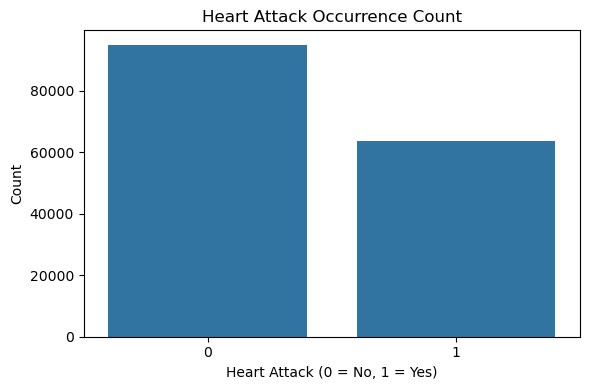

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_attack', data=df)
plt.title('Heart Attack Occurrence Count')
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE
over=SMOTE(random_state=5)
x_ov,y_ov=over.fit_resample(x,y)
y_ov.value_counts()

heart_attack
0    94854
1    94854
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ov,y_ov,test_size=0.25,random_state=2)

Test accuracy: 0.7057161532460413
train accuracy: 0.8175582122700853
CR:               precision    recall  f1-score   support

           0       0.71      0.70      0.70     23705
           1       0.70      0.71      0.71     23722

    accuracy                           0.71     47427
   macro avg       0.71      0.71      0.71     47427
weighted avg       0.71      0.71      0.71     47427



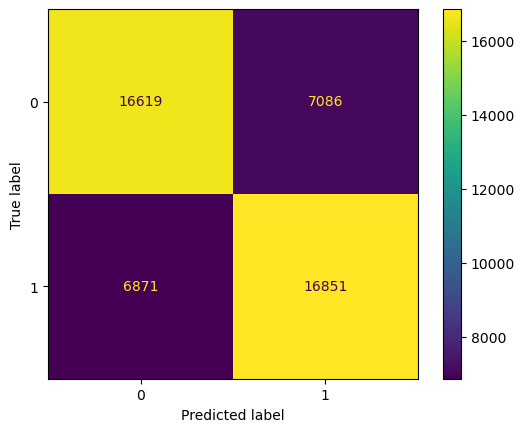

In [31]:
xgb=XGBClassifier(learning_rate=0.2,max_depth=7,min_samples_split=10,n_estimators=300)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
xgbp=accuracy_score(y_test,y_pred)*100

In [39]:
xgb=XGBClassifier(learning_rate=0.2,max_depth=7,min_samples_split=10,n_estimators=300)
xgb.fit(x_train,y_train)
xgb.save_model("heart_attack_model.json")

In [41]:
import joblib
joblib.dump(xgb, "heart_attack_prediction.pkl")
joblib.dump(scaler,"scaler.pkl")
joblib.dump(le,"le_gender.pkl")           
joblib.dump(le1,"le1_smoking.pkl")    
joblib.dump(le2,"le2_physical_activity.pkl") 
joblib.dump(le3,"le3_stress_level.pkl") 
joblib.dump(x,"features.pkl")

['features.pkl']